In [61]:
## Loading the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
## loading the data
df = pd.read_csv("payment_fraud.csv")

**Exploration Data Analysis**

In [4]:
df.head(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
5,119,1,4.962055,paypal,0.000000,0
6,2000,1,4.921349,paypal,0.000000,0
7,371,1,4.876771,creditcard,0.000000,0
8,2000,1,4.748314,creditcard,0.000000,0
9,4,1,4.461622,creditcard,0.000000,0


In [5]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [30]:
df.shape

(39221, 6)

In [8]:
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

In [11]:
df["numItems"].value_counts()

1     37398
2      1348
5       168
3       164
10       71
4        42
6        15
7         5
8         5
9         1
11        1
12        1
15        1
29        1
Name: numItems, dtype: int64

In [105]:
df["paymentMethod"].value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

<AxesSubplot:ylabel='Frequency'>

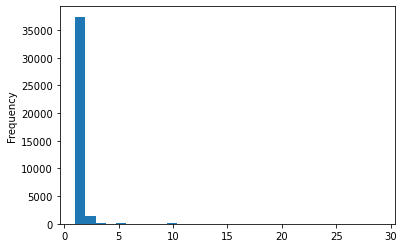

In [19]:
df["numItems"].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

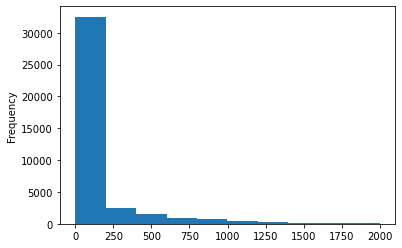

In [20]:
df["paymentMethodAgeDays"].plot.hist()

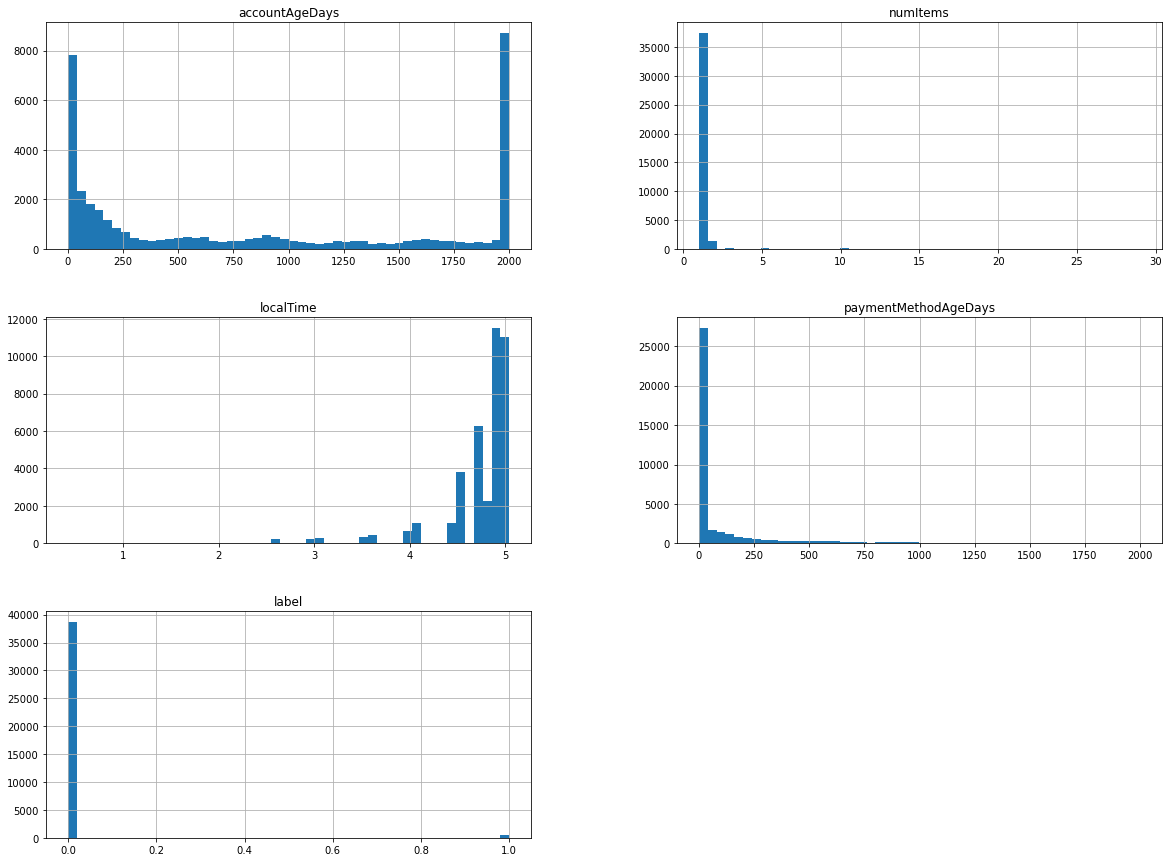

In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

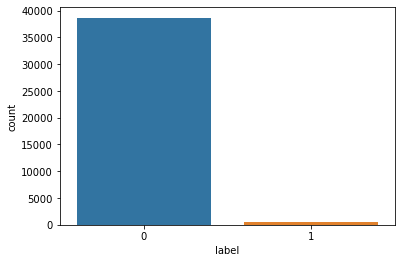

In [23]:
sns.countplot(x="label", data=df)

**Correlation analysis**

In [22]:
##Calculation of the standard correlation coefficient
corr_matrix = df.corr()

In [24]:
## Let's look at how much each attribute correlated wit label
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
numItems                0.038116
paymentMethodAgeDays   -0.052047
localTime              -0.059505
accountAgeDays         -0.128098
Name: label, dtype: float64

Attributes are not that much correlated to the label except "accountAgeDays" which is slightly negatively correlated. 

**Splitting the data into train and test datasets**

In [27]:
## Separating features and target datasets
features_df = df.drop("label", inplace=False, axis=1)
target = df["label"]

In [28]:
features_df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays
0,29,1,4.745402,paypal,28.204861
1,725,1,4.742303,storecredit,0.000000
2,845,1,4.921318,creditcard,0.000000
3,503,1,4.886641,creditcard,0.000000
4,2000,1,5.040929,creditcard,0.000000


In [29]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [31]:
## Creating the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2, random_state=42)

**Preparing the datasets for the Machine Learning algorithms**

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

In [36]:
num_names = list(features_df.drop("paymentMethod", axis=1))

In [37]:
num_names

['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']

In [38]:
cat_names = ["paymentMethod"]

In [94]:
class AttributesSelectedTransformation(BaseEstimator, TransformerMixin):
    def __init__(self, num_attributes_selected):
        self.num_attributes_selected = num_attributes_selected
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_selected = X[self.num_attributes_selected]
        return X_selected

Building a **full pipeline** using `FeatureUnion()`

In [101]:
num_pipeline = Pipeline([
    ("select_num", AttributesSelectedTransformation(num_names)),
    
])

In [96]:
cat_pipeline = Pipeline([
    ("select_cat", AttributesSelectedTransformation(cat_names)),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [102]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [103]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [99]:
X_train_prepared.shape

(31376, 7)

In [104]:
X_train_prepared

array([[2.000000e+03, 1.000000e+00, 4.965339e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.889000e+03, 1.000000e+00, 4.836982e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.565000e+03, 1.000000e+00, 4.921349e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [5.290000e+02, 1.000000e+00, 4.895263e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.370000e+02, 1.000000e+00, 4.965339e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.000000e+03, 1.000000e+00, 4.836982e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00]])

## Applying Machine Learning Algorithms

**SVM**

In [43]:
from sklearn.svm import SVC

In [59]:
from sklearn.metrics import precision_score, recall_score

In [106]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train_prepared, y_train)

SVC(gamma='auto')

In [45]:
from sklearn.model_selection import cross_val_score

In [107]:
svm_scores = cross_val_score(svm_clf, X_train_prepared, y_train, cv=10)
svm_scores.mean()

0.9999681325685149

In [108]:
y_train_pred_svm = svm_clf.predict(X_train_prepared)

In [109]:
confusion_matrix(y_train, y_train_pred_svm)

array([[30934,     0],
       [    1,   441]], dtype=int64)

In [122]:
precision_score(y_train, y_train_pred_svm)

1.0

In [123]:
recall_score(y_train, y_train_pred_svm)

0.997737556561086

**Logistic Regression**

In [110]:
lg_clf = LogisticRegression()
lg_clf.fit(X_train_prepared, y_train)

LogisticRegression()

In [111]:
lg_scores = cross_val_score(lg_clf, X_train_prepared, y_train, cv=10)
lg_scores.mean()

1.0

In [112]:
y_train_pred_lg = lg_clf.predict(X_train_prepared)

In [113]:
confusion_matrix(y_train, y_train_pred_lg)

array([[30934,     0],
       [    0,   442]], dtype=int64)

**Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier()

In [115]:
forest_scores = cross_val_score(forest_clf, X_train_prepared, y_train, cv=10)
forest_scores.mean()

1.0

In [116]:
y_train_pred_rf = forest_clf.predict(X_train_prepared)

In [117]:
confusion_matrix(y_train, y_train_pred_rf)

array([[30934,     0],
       [    0,   442]], dtype=int64)

In [64]:
precision_score(y_train, y_train_pred_rf)

1.0

In [65]:
recall_score(y_train, y_train_pred_rf)

1.0

Random Forest and logistic regression are the algorithms that are performing the best on the dataset.

# Application on test data

In [118]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [119]:
y_pred = forest_clf.predict(X_test_prepared)

In [120]:
confusion_matrix(y_test, y_pred)

array([[7727,    0],
       [   0,  118]], dtype=int64)

In [121]:
accuracy_score(y_test, y_pred)

1.0